# Section 1 - Setting up stuff...

Some templates taken as starting point (from kaggle tutorial) to build basic starting point

## Imports and data files checks

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import seaborn as sns # to change the visualization style to a base Seaborn style
sns.set() 
import matplotlib.pyplot as plt
#below allows to draw plots right under the cell rather than with separate window
#%matplotlib inline

In [1]:
train_data = pd.read_csv("../dataset/train.csv")
train_data.head(3)

NameError: name 'pd' is not defined

In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Section 2 - Lets look on data we have

## Basic data analysis

In [4]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S


We need to extract data types we have in train set, below method will summarize it

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Looking on this we can spot which features do miss some values and what are their types:

**Age** - 714 filled - since this value for sure impacts our model we **will add** the missing ones

**Cabin** - 204 filled - majority of this is not filled in so putting the data there will be rather a big speculation as so not good candidate to be taken under consideration for our model, thus **dropping this** column makes most sense

**Embarked** - 889 filled - only 2 missing - very low impact on training set so no harm if we **fill this** in and keep consistency

Always good to check if we have duplicates:

In [6]:
train_data.loc[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Looks not... lets continue then

## Visualizing data

Now its time to make some predictions with graphs to find strongest features influencing survavibility, lets analyze all of them:



In [7]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


'PassengerId' - not relevant for our predictions

'Survived' - this is what we want to predict s we cant take this

'Pclass' - YES, passenger class may have an influence on where passeger was during catastrophy - visualize it to spot it

'Name' - NO, - not relevant for our predictions

'Sex' - YES, depends on sex we may see higher or lower ratio so investigate it and visualize it

'Age' - YES, age may have influence on survivability - investigate and visualize it

'SibSp' - YES, having siblings or spouse may affect survavibility - check it and visualize it

'Parch' - YES, parents with kids may have impact, maybe its good to corelate this with 'SibSp' under 'Family_members', anywa investigate

'Ticket' - NO, ticket is alphannumeric and does not show any specific corelation to survavibility rate

'Fare' - YES, this looks like a corelation to Pclass maybe? - investigate it

'Cabin' - NO, as mentioned above since there are too many missing data on this its hard to corelate 

'Embarked' - YES, port from which passegner embarked - investigate it

**Pclass**

<Axes: xlabel='Pclass', ylabel='Survived'>

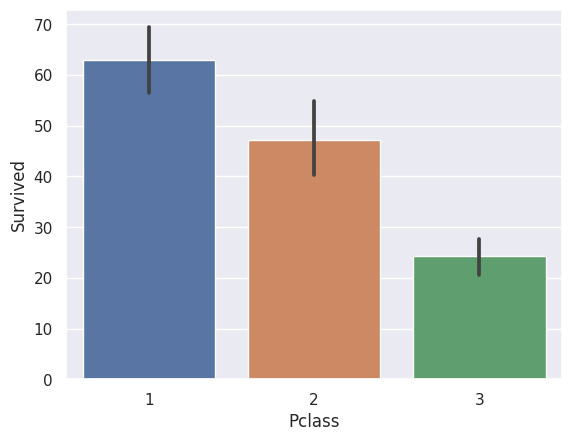

In [8]:
sns.barplot(x="Pclass", y="Survived", data=train_data, estimator=lambda x: sum(x == 1) * 100 / len(x))

**Conclusion: Pclass** has big impact on survavibility as most of the passengers in 1st class survived while 3rd died

**Sex**

<Axes: xlabel='Sex', ylabel='Survived'>

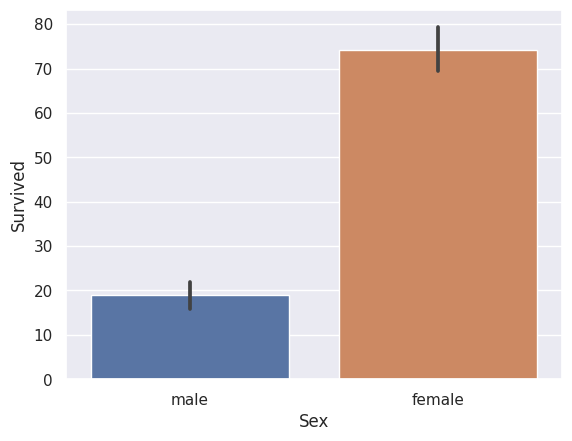

In [9]:
sns.barplot(x="Sex", y="Survived", data=train_data, estimator=lambda x: sum(x == 1) * 100 / len(x))

In [10]:
train_data.groupby(train_data['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Conclusion: Sex** - important factor as majority of women survived while men died

**Age**

<Axes: xlabel='Age', ylabel='Survived'>

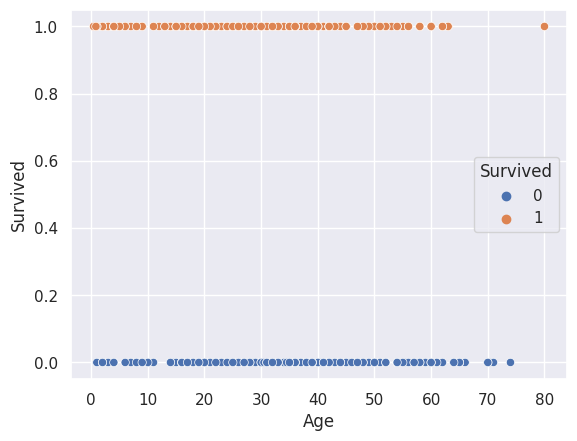

In [11]:
sns.scatterplot(x="Age", y="Survived", data=train_data, hue='Survived')

Since there are many values for age its better to group them to find some corelation with survavibiloty, lets try it with:

<Axes: xlabel='Age'>

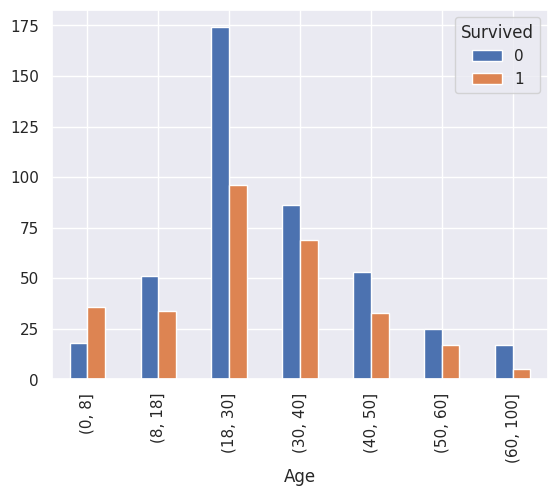

In [12]:
group = pd.cut(train_data.Age, [0,8,18,30,40,50,60,100])
piv_fare = train_data.pivot_table(index=group, columns='Survived', values = 'Age', aggfunc='count', observed=False)
piv_fare.plot(kind='bar')

**Conclusion: Age** - looks like kids had higher chances to survive than other groups but overall Age is not strongly corelated with Survived. Also keep in mind that there are about 20% missing values in train set.

**SibSp**

In [13]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Conclusion: SibSp** - From this quick look we know that people with bigger families were less likely to survive. We will combine this parameter into 'Family' in Section 3

**Parch**

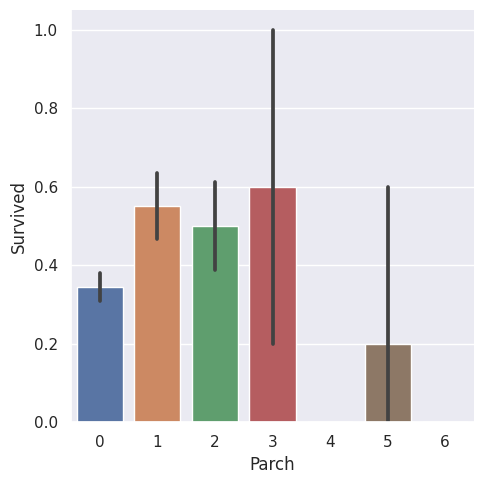

In [14]:
sns.catplot(x='Parch', y='Survived', data=train_data, kind='bar')

**Conclusion: Parch** - People with less than 4 children are more likely to survive, on the other hand people without childrean are also less likely to survive (than 1-3 members families) We will combine this parameter into 'Family' in Section 3

**Fare**

<Axes: xlabel='Fare', ylabel='Survived'>

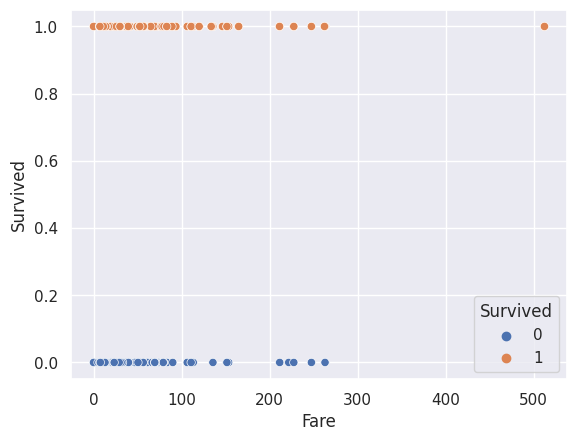

In [15]:
sns.scatterplot(x="Fare", y="Survived", data=train_data, hue='Survived')

Here also since there are many value it make sens to group them

<Axes: xlabel='Fare'>

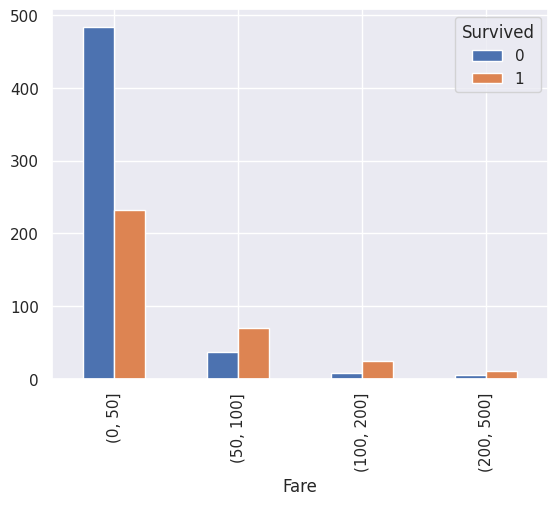

In [16]:
group = pd.cut(train_data.Fare, [0,50,100,200,500])
piv_fare = train_data.pivot_table(index=group, columns='Survived', values = 'Fare', aggfunc='count', observed=False)
piv_fare.plot(kind='bar')

Conclusion: Fare - it looks like more expensive tickets survived more

**Embarked**

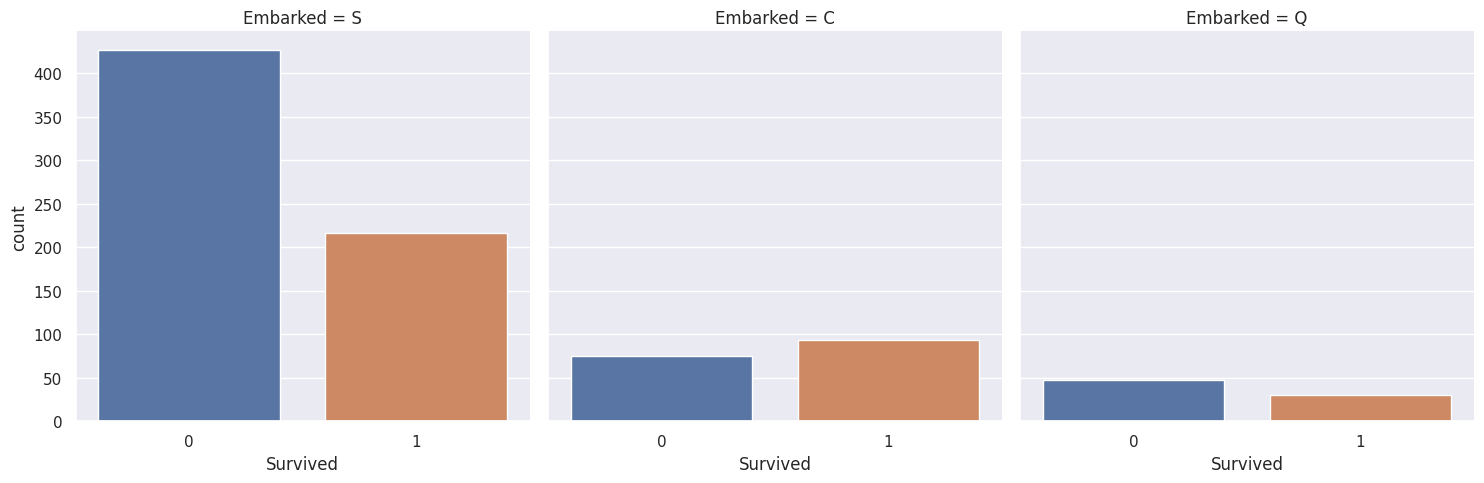

In [17]:
sns.catplot(x='Survived',col='Embarked',data=train_data,kind='count')

**Conclusion: Embarked** - looks like passegners embarking in Southampton were less likely to survive

These were mostly simple corelations check with Survived but for sure there are more fancy ones which can be interesting.

# Section 3 - Data cleanup

In this section we modify our sets based on the observations from Section 2

## Data merges

First - since SibSp and Parch are actually pretty much the same factor we can combine them into one, bascially adding FamilySize into train and test sets

In [18]:
all_data = [train_data,test_data]   # matrix of matrixes with our data
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Lets verify this with simple check

In [19]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

NOTE: Seen cases where other fields were merged, for simplicity of this notebook I have only focused on one example as above

Since original columns are no longer needed lets drop them (remember to do it in both sets) The same for features marked earlier as not relevant - Name, Ticket, Cabin

In [20]:
train_data = train_data.drop(['Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp', 'Name', 'Ticket', 'Cabin'], axis=1)


In [21]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked  

## Filling in missing data

For rows with NaNs we need to fill the data for model to work properly

In [22]:
null_counts_train = train_data.isnull().sum()
columns_with_nulls_train = null_counts_train[null_counts_train > 0]
null_counts_test = test_data.isnull().sum()
columns_with_nulls_test = null_counts_test[null_counts_test > 0]
print(f'{columns_with_nulls_train},\n{columns_with_nulls_test}')

Age         177
Embarked      2
dtype: int64,
Age     86
Fare     1
dtype: int64


So we do see that we need to fill out Age in both sets, Embarked in train and Fare in test

Lets first pick up Age. Here multiple approaches can be used, most simple one is the mean of all values, other one is to corelate this with passenger class mean, another one is calculate it based on the tile of passenger name like Mr, Miss etc. We will go middle one corelating age with passenger class

In [23]:
def age_imputing(position):
    if pd.isnull(position.iloc[0]):
        if position.iloc[1] == 3:
            return 25
        elif position.iloc[1] == 2:
            return 30
        else:
            return 35
    else:
        return position.iloc[0]

In [24]:
train_data["Age"] = train_data[['Age','Pclass']].apply(age_imputing,axis=1)
test_data["Age"] = test_data[['Age','Pclass']].apply(age_imputing,axis=1)
null_counts_train = train_data.isnull().sum()
columns_with_nulls_train = null_counts_train[null_counts_train > 0]
null_counts_test = test_data.isnull().sum()
columns_with_nulls_test = null_counts_test[null_counts_test > 0]
print(f'{columns_with_nulls_train},\n{columns_with_nulls_test}')

Embarked    2
dtype: int64,
Fare    1
dtype: int64


No Age on the list, good to go! Remaining 2 are in low number so not big impact but lets fix them with 

In [25]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())
train_data = train_data.fillna({"Embarked": "S"})
null_counts_train = train_data.isnull().sum()
columns_with_nulls_train = null_counts_train[null_counts_train > 0]
null_counts_test = test_data.isnull().sum()
columns_with_nulls_test = null_counts_test[null_counts_test > 0]
print(f'{columns_with_nulls_train},\n{columns_with_nulls_test}')

Series([], dtype: int64),
Series([], dtype: int64)


# Section 4 - RandomForest submission

In [26]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "Age", "FamilySize", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(criterion='gini', n_estimators=900,
                             min_samples_split=15,min_samples_leaf=1,
                             oob_score=True, random_state=1,n_jobs=-1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
